In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
data.shape

(303, 14)

In [7]:
X = data.drop(columns='target', axis = 1) 
y = data['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
train_predict = model.predict(X_train)
train_score = round(accuracy_score(y_train, train_predict)*100,2)
print(f'Train accuracy score: {train_score}%')

Train accuracy score: 83.06%


In [15]:
test_predict = model.predict(X_test)
test_score = round(accuracy_score(y_test, test_predict)*100,2)
print(f'Train accuracy score: {test_score}%')

Train accuracy score: 90.16%


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
cf_matrix = confusion_matrix(y_test, test_predict)
print(cf_matrix)

[[26  6]
 [ 0 29]]


In [18]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

26 6 0 29


<AxesSubplot:>

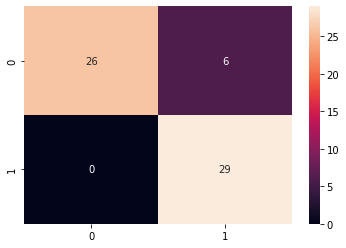

In [19]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)